In [ ]:
# Subject-Driven Ability: Our model can identify the described subject in multi-person images and generate group images of individuals from multiple sources. This end-to-end process requires no additional recognition or segmentation, highlighting OmniGen's flexibility and versatility.
from PIL import Image
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # select a gpu to run OmniGen
# os.environ['HF_HUB_CACHE'] = 'path_to_save_downloaded_model'

from OmniGen import OmniGenPipeline

pipe = OmniGenPipeline.from_pretrained("Shitao/OmniGen-v1")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/15.5G [00:00<?, ?B/s]

demo_cases.png:   0%|          | 0.00/3.42M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.29k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading safetensors


100%|██████████| 50/50 [01:32<00:00,  1.85s/it]


output:


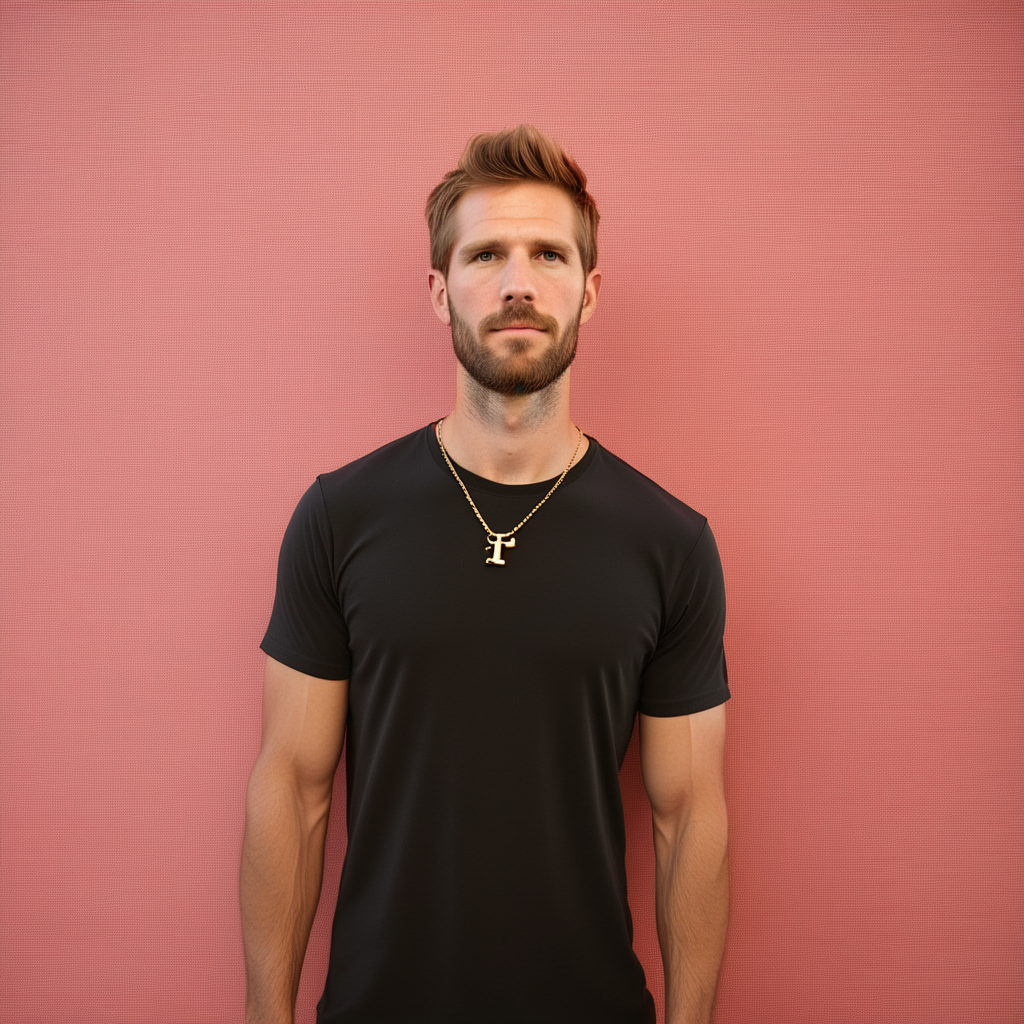

In [ ]:

prompt="A man in <img><|image_1|></img> is wearing a necklace in <img><|image_2|></img>."
p='./examples/example2/inputs/'
output_p = './examples/example2/output/'

input_images=[p+'person_1.png', p+'product_1.png']
images = pipe(
    prompt=prompt, 
    input_images=input_images, 
    height=1024, 
    width=1024,
    guidance_scale=2.5, 
    img_guidance_scale=1.6,
    separate_cfg_infer=True,
    seed=42)
images[0].save(output_p+"result_2.png")
# print("input_image: ")
# for img in input_images:
#     Image.open(img).show()
print("output:")
images[0].show()

100%|██████████| 50/50 [01:44<00:00,  2.10s/it]


input_image: 


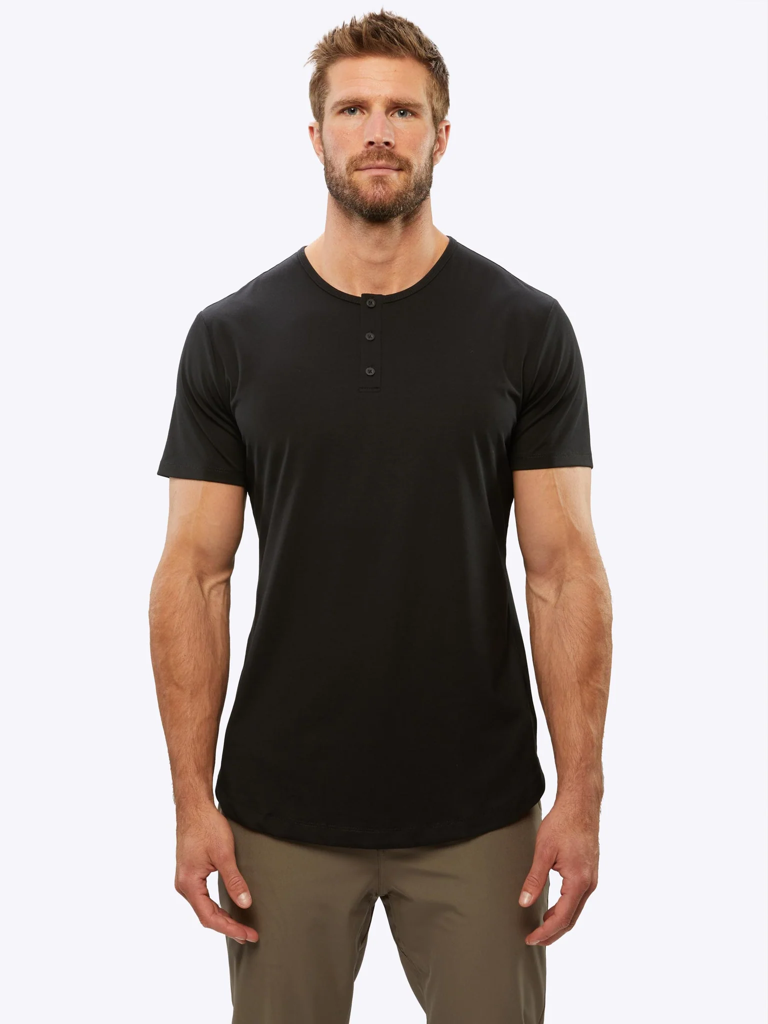

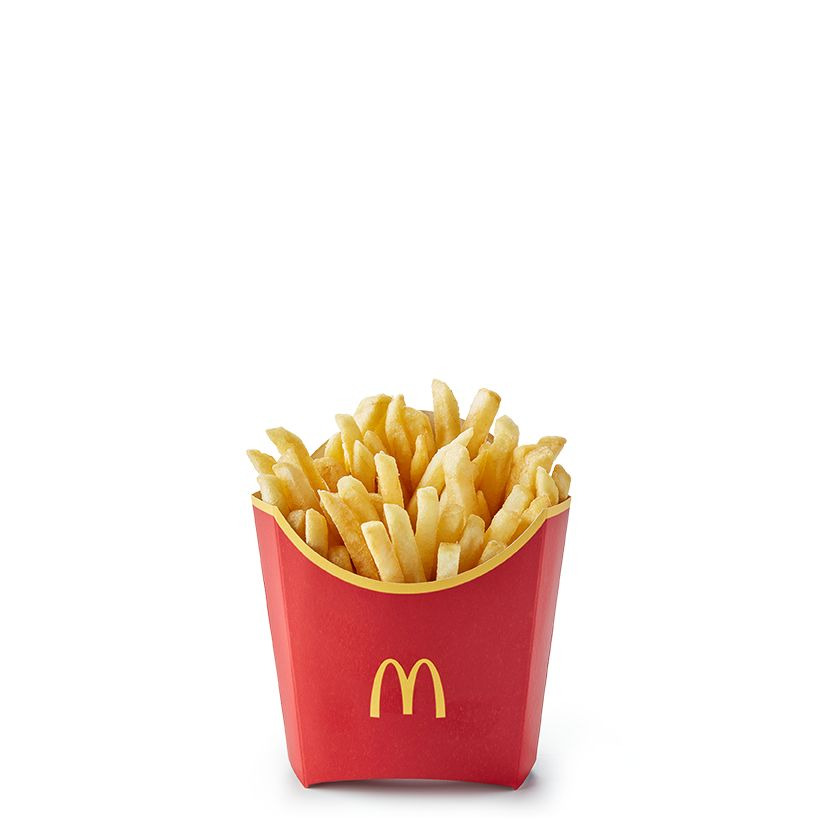

output:


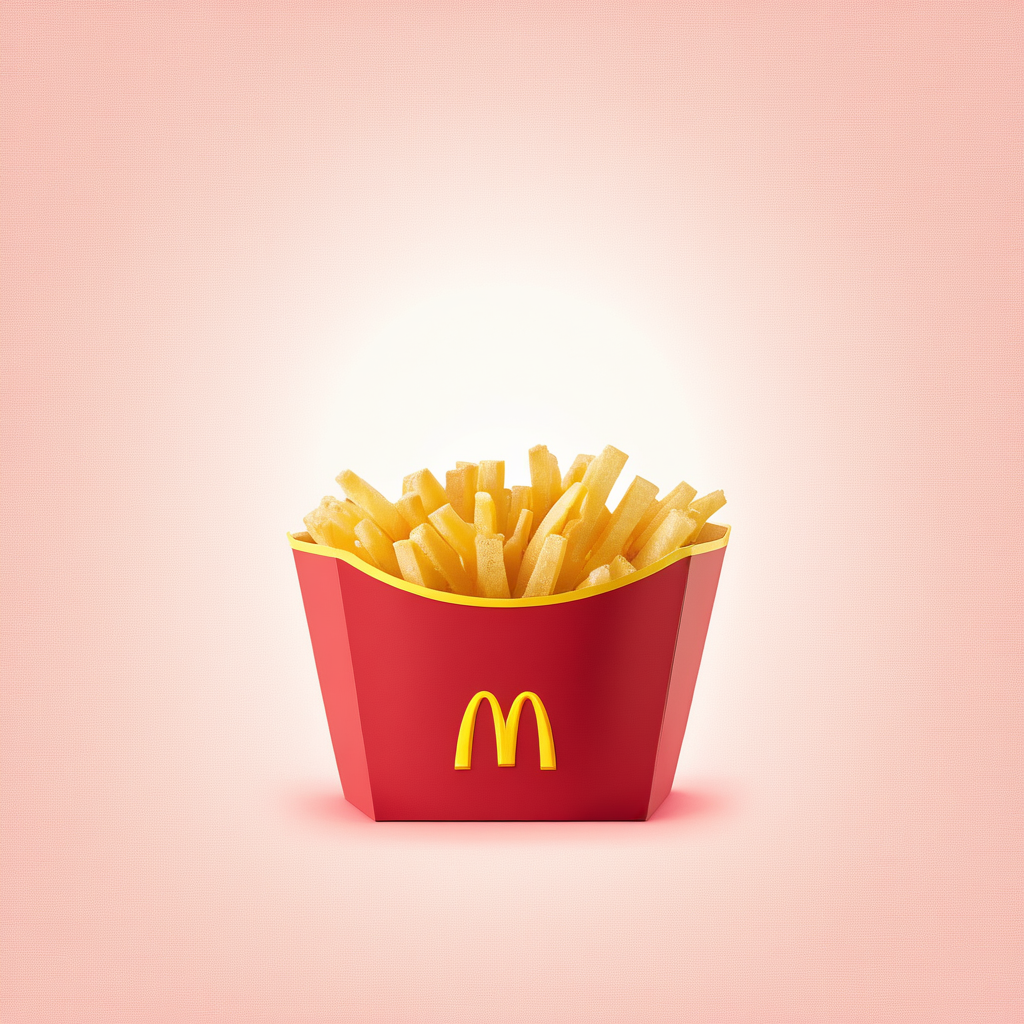

In [ ]:

# prompt="A man in <img><|image_1|></img> is holding mcdonald's french fries as shown in in <img><|image_2|></img>."
prompt="A man resembling the avatar identity from the reference image (<img><|image_1|></img>) is holding McDonald's French fries as depicted in the reference object image (<img><|image_2|></img>). The man should maintain the same facial features, hairstyle, and overall appearance from <img><|image_1|></img>, while the French fries should be identical in style, packaging, and presentation to <img><|image_2|></img>. The composition should be photorealistic, with lighting and textures coherent to a professional product-level photograph, ensuring the integration appears natural and seamless."
p='./examples/example1/inputs/'
output_p = './examples/example1/output/'

input_images=[p+'person_1.png', p+'product_0.png']
images = pipe(
    prompt=prompt, 
    input_images=input_images, 
    height=1024, 
    width=1024,
    guidance_scale=2.5, 
    img_guidance_scale=1.6,
    separate_cfg_infer=True,
    seed=42)
images[0].save(output_p+"result.png")
print("input_image: ")
for img in input_images:
    Image.open(img).show()
print("output:")
images[0].show()

In [ ]:
## Ablation


# prompt="A man in <img><|image_1|></img> is holding mcdonald's french fries as shown in in <img><|image_2|></img>."
prompt="A man in (<img><|image_1|></img>) is holding McDonald's French fries as shown in <img><|image_2|></img>. The composition should be photorealistic, with lighting and textures coherent to a professional product-level photograph, ensuring the integration appears natural and seamless."
p='./examples/example1/inputs/'
output_p = './examples/example1/output/'

# guidance_scale = 2.5
# img_guidance_scale = 2.5
# pipe.device='cuda'

for guidance_scale in [ 2.5, 3.5, 1.0]:
    for img_guidance_scale in [2.5, 3.5, 1.6]:
        input_images=[p+'person_1.png', p+'product_0.png']
        images = pipe(
            prompt=prompt, 
            input_images=input_images, 
            height=1024, 
            width=1024,
            guidance_scale=guidance_scale, 
            img_guidance_scale=img_guidance_scale,
            separate_cfg_infer=True,
            seed=42)
        images[0].save(output_p+"result_guidescale%.2f_img_guidescale%.2f.png" %(guidance_scale, img_guidance_scale))
        # print("input_image: ")
        # for img in input_images:
        #     Image.open(img).show()
        print("output:")
        images[0].show()